In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from prophet import Prophet

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("dataset_cuaca_perjam-prophet.csv")

In [3]:
df

,date,year,month,day,hour,t2m,rh2m,ps,ws10m
0,11/30/2013,2013.0,11.0,30.0,7:00:00,27.36,78.94,100.80,3.17
1,11/30/2013,2013.0,11.0,30.0,8:00:00,28.47,73.19,100.85,2.65
2,11/30/2013,2013.0,11.0,30.0,9:00:00,29.44,69.56,100.83,2.04
3,11/30/2013,2013.0,11.0,30.0,10:00:00,30.12,67.38,100.77,1.73
4,11/30/2013,2013.0,11.0,30.0,11:00:00,30.44,66.38,100.70,1.87
...,...,...,...,...,...,...,...,...,...
1048570,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,--,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## PREPROCESSING

In [4]:
df.dropna(inplace=True)

In [5]:
df = df.drop(columns=['year', 'month', 'day'], axis=1)

In [6]:
df.isnull().sum()

date     0
hour     0
t2m      0
rh2m     0
ps       0
ws10m    0
dtype: int64

In [7]:
df.dtypes

date      object
hour      object
t2m      float64
rh2m     float64
ps       float64
ws10m    float64
dtype: object

In [8]:
df['date'] = pd.to_datetime(df['date'])
df['hour'] = pd.to_timedelta(df['hour'])
df['time'] = df['date'] + df['hour']

In [9]:
del df['date']
del df['hour']

In [10]:
df.rename(
    columns={"time": "ds", "ps": "y"},
    inplace=True,
)

In [11]:
df.dtypes

t2m             float64
rh2m            float64
y               float64
ws10m           float64
ds       datetime64[ns]
dtype: object

In [12]:
df.set_index(df['ds'], inplace = True)

In [13]:
# df['T_target'] = df.shift(-1)['T2M']
# df['RH_target'] = df.shift(-1)['RH2M']
# df['PS_target'] = df.shift(-1)['PS']
# df['WS_target'] = df.shift(-1)['WS10M']

In [14]:
df.dropna(inplace=True)

In [15]:
# # df.sort_index(inplace=True)

# # start_date = '2021-04-01 09:00:00'
# # end_date = '2022-05-01 16:00:00'

# df = df.iloc[-100:]

In [16]:
del df['ds']
del df['rh2m']
del df['t2m']
del df['ws10m']

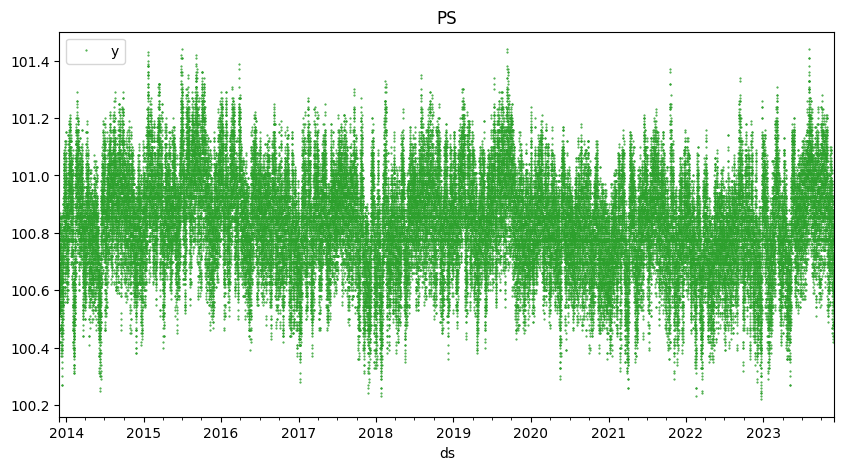

In [17]:
color_pal=sns.color_palette()
df.plot(style='.',
          figsize=(10, 5),
          ms=1,
          color=color_pal[2], title = 'PS')
plt.show()

In [18]:
# df.sort_index(inplace=True)
# data_range = df.loc['2023-11-01 09:00:00':'2023-12-01 09:00:00']

In [19]:
# df['2021':'2022'].plot(subplots=True, figsize=(20,12))

In [20]:
# data_range['T2M'].plot()

## SPLITTING DATA

In [21]:
# df.reset_index(inplace=True)

In [22]:
df = df.sort_index()

train_percentage = 0.8
train_size = int(len(df) * train_percentage)

train_data = df[:train_size]
test_data = df[train_size:]


In [23]:
model = Prophet()
fit_model = model.fit(train_data.reset_index())

21:09:06 - cmdstanpy - INFO - Chain [1] start processing
21:09:37 - cmdstanpy - INFO - Chain [1] done processing


In [24]:
# # future = pd.DataFrame({'ds': train_data['ds']})
# future = model.make_future_dataframe(periods=10000, freq='h')
# forecast = model.predict(future)

In [25]:
df

,y
ds,
2013-11-30 07:00:00,100.80
2013-11-30 08:00:00,100.85
2013-11-30 09:00:00,100.83
2013-11-30 10:00:00,100.77
2013-11-30 11:00:00,100.70
...,...
2023-12-01 02:00:00,100.63
2023-12-01 03:00:00,100.62
2023-12-01 04:00:00,100.67


In [26]:
# future = pd.DataFrame({'ds': train_data['ds']})
# future = model.make_future_dataframe(periods=10000, freq='h')
forecast = model.predict(test_data.reset_index())

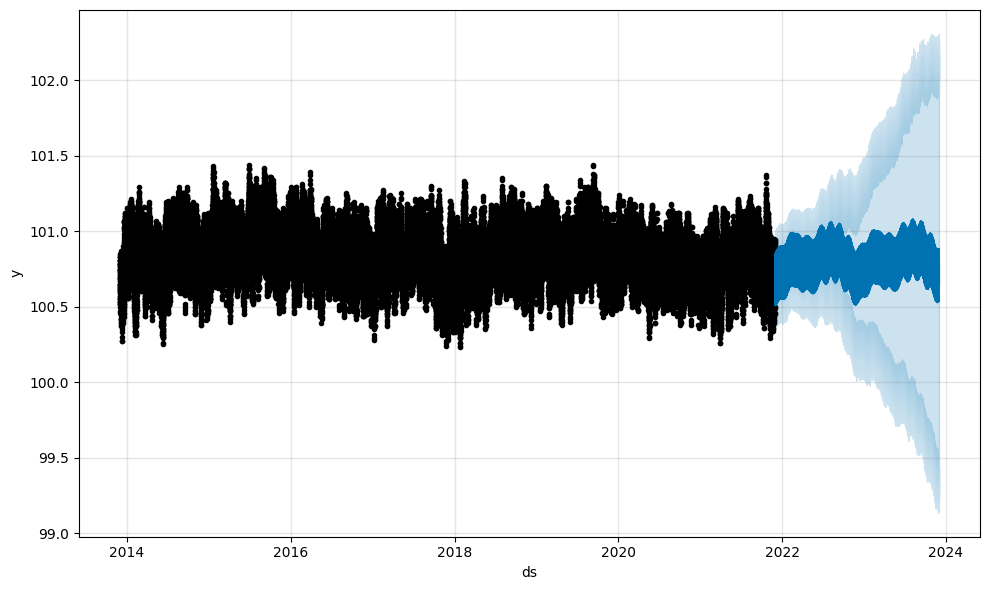

In [27]:
fig = model.plot(forecast)

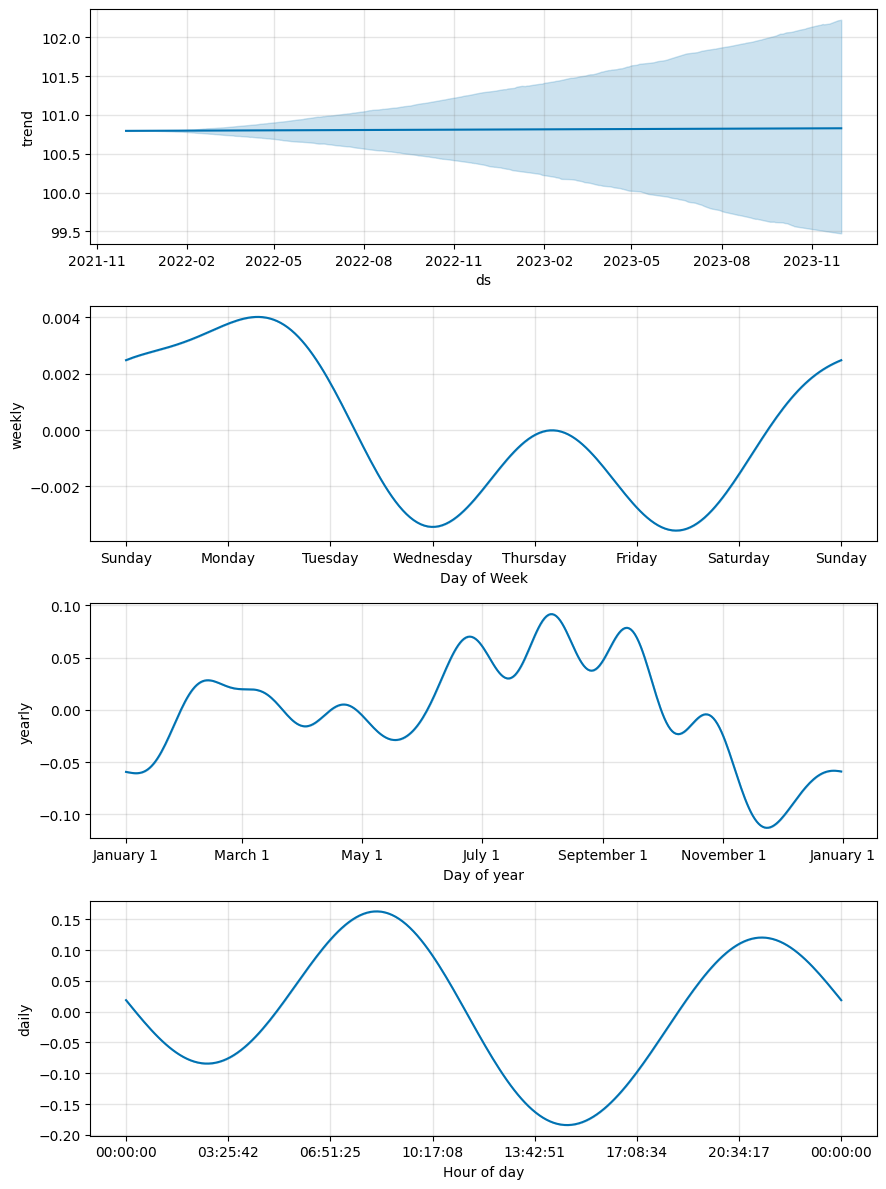

In [28]:
fig = model.plot_components(forecast)

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2021-11-30 16:00:00,100.794857,100.374668,100.675613,100.794857,100.794857,-0.265846,-0.265846,-0.265846,-0.159423,...,-0.002669,-0.002669,-0.002669,-0.103755,-0.103755,-0.103755,0.0,0.0,0.0,100.529011
1,2021-11-30 17:00:00,100.794859,100.436462,100.724094,100.794859,100.794859,-0.213911,-0.213911,-0.213911,-0.107400,...,-0.002844,-0.002844,-0.002844,-0.103666,-0.103666,-0.103666,0.0,0.0,0.0,100.580948
2,2021-11-30 18:00:00,100.794861,100.502328,100.801540,100.794861,100.794861,-0.145253,-0.145253,-0.145253,-0.038676,...,-0.002999,-0.002999,-0.002999,-0.103578,-0.103578,-0.103578,0.0,0.0,0.0,100.649608
3,2021-11-30 19:00:00,100.794863,100.577928,100.867849,100.794863,100.794863,-0.074413,-0.074413,-0.074413,0.032206,...,-0.003131,-0.003131,-0.003131,-0.103489,-0.103489,-0.103489,0.0,0.0,0.0,100.720450
4,2021-11-30 20:00:00,100.794865,100.628375,100.919957,100.794865,100.794865,-0.017424,-0.017424,-0.017424,0.089215,...,-0.003239,-0.003239,-0.003239,-0.103399,-0.103399,-0.103399,0.0,0.0,0.0,100.777441
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17530,2023-12-01 02:00:00,100.828122,99.243728,102.039373,99.474699,102.226509,-0.182453,-0.182453,-0.182453,-0.075472,...,-0.003050,-0.003050,-0.003050,-0.103931,-0.103931,-0.103931,0.0,0.0,0.0,100.645669
17531,2023-12-01 03:00:00,100.828124,99.238025,102.006223,99.474636,102.226716,-0.189981,-0.189981,-0.189981,-0.082960,...,-0.003177,-0.003177,-0.003177,-0.103843,-0.103843,-0.103843,0.0,0.0,0.0,100.638143
17532,2023-12-01 04:00:00,100.828126,99.284992,102.041725,99.474573,102.226923,-0.163805,-0.163805,-0.163805,-0.056762,...,-0.003289,-0.003289,-0.003289,-0.103755,-0.103755,-0.103755,0.0,0.0,0.0,100.664320
17533,2023-12-01 05:00:00,100.828127,99.305840,102.132596,99.474510,102.227130,-0.110125,-0.110125,-0.110125,-0.003076,...,-0.003383,-0.003383,-0.003383,-0.103666,-0.103666,-0.103666,0.0,0.0,0.0,100.718003


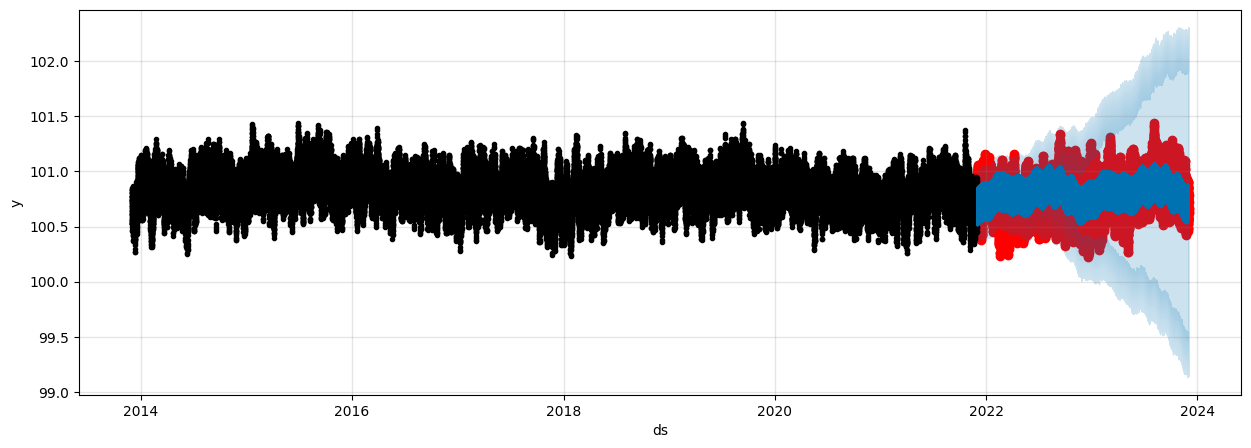

In [30]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(test_data.index, test_data['y'], color='r')
fig = model.plot(forecast, ax=ax)

In [31]:
test_data['y']

ds
2021-11-30 16:00:00    100.60
2021-11-30 17:00:00    100.68
2021-11-30 18:00:00    100.78
2021-11-30 19:00:00    100.86
2021-11-30 20:00:00    100.93
                        ...  
2023-12-01 02:00:00    100.63
2023-12-01 03:00:00    100.62
2023-12-01 04:00:00    100.67
2023-12-01 05:00:00    100.72
2023-12-01 06:00:00    100.79
Name: y, Length: 17535, dtype: float64

In [32]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(test_data['y'], forecast['yhat'])
mse = mean_squared_error(test_data['y'], forecast['yhat'])
rmse = np.sqrt(mse)
mape = np.mean(np.abs((np.array(test_data['y']) - np.array(forecast['yhat'])) / np.array(test_data['y']))) * 100
r2score = r2_score(test_data['y'], forecast['yhat'])

In [33]:
print('mae :', mae)
print('mse :', mse)
print('rmse :', rmse)
print('mape :', mape)
print('r2 :', r2score)

mae : 0.11020031287528352
mse : 0.01839029264159635
rmse : 0.13561081314407178
mape : 0.1093518709364534
r2 : 0.38753439491752995


In [34]:
import joblib

joblib.dump(fit_model, 'prophet_model_ps.pkl')

['prophet_model_ps.pkl']